# <center><span style="color:red" fontsize = 50px> Indian Premier League  </span></center>

![](t.jpg)

# I am Big Fan Of MSD <3 

![](msd.jpg)


## 1 .  Importing Libraries
## 2 .  Reading Data File
## 3 .  Data Preprocessing
## 4 .  EDA 
## 5 .  Visualisation With Plotly express


In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_style('darkgrid')
import warnings
import plotly.graph_objects as go
warnings.filterwarnings("ignore")

In [194]:
data = pd.read_csv("matches.csv")
data = pd.DataFrame(data)
print("Original DataFrame Size :",data.shape)
data.head()

Original DataFrame Size : (756, 18)


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


# Let's remove unwanted features from our dataset

In [195]:
 data.drop(["id","date","umpire1","umpire2","umpire3"],inplace = True,axis = 1)

# Let's see missing value's count visually using Barchart


In [196]:
missing_value = pd.DataFrame(data.isnull().sum(),columns =["counts"])
missing_value = missing_value[missing_value.counts > 0]
px.bar(data_frame = missing_value,x = missing_value.index ,y = "counts",color = ["blue","pink","orange"])

In [197]:
data.dropna(axis = 0,inplace = True)
print("Original DataFrame Size After removing  rows with atleast one null values  :",data.shape)

Original DataFrame Size After removing  rows with atleast one null values  : (745, 13)


In [198]:
data.head(2)

,season,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium


In [199]:
data.winner      = data.winner.replace("Rising Pune Supergiant","Rising Pune Supergiants")
data.team1       = data.team1.replace("Rising Pune Supergiant","Rising Pune Supergiants")
data.team2       = data.team2.replace("Rising Pune Supergiant","Rising Pune Supergiants")
data.toss_winner = data.toss_winner.replace("Rising Pune Supergiant","Rising Pune Supergiants")


# Let's Begin EDA with Plotly

# Which Team won the more number of matchs ? From 2008 to 2019
Ans : Mumbai Indians

In [200]:
px.bar(x = data.winner.value_counts().index, y = data.winner.value_counts().values , color =data.winner.value_counts().index,labels = {"x":"IPL Teams","y":"Number of Mactch's won By Indvivual Team"},title = "")

# Which Team won the more number of Toss's ? From 2008 to 2019
Ans : Mumbai Indians

In [201]:
px.bar(x = data.toss_winner.value_counts().values,y = data.toss_winner.value_counts().index,orientation = "h",color = data.toss_winner.value_counts().index ,labels = {"y":"Teams","x":"Number of Tosse's won By Indvivual Team"})

# Weather is it Fielding decision or Batting decision Choosed by Most of the toss winner's ? 
Ans : Fielding

In [202]:
px.pie(names = data.toss_decision.value_counts().index ,values =  data.toss_decision.value_counts().values,title = "Fielding or Batting")

# Which are the Matches ended up in tie ?

In [203]:
data[data.result == "tie"][["season","team1","team2","result"]]

,season,team1,team2,result
33,2017,Gujarat Lions,Mumbai Indians,tie
125,2009,Rajasthan Royals,Kolkata Knight Riders,tie
189,2010,Kings XI Punjab,Chennai Super Kings,tie
387,2013,Royal Challengers Bangalore,Sunrisers Hyderabad,tie
400,2013,Delhi Daredevils,Royal Challengers Bangalore,tie
475,2014,Rajasthan Royals,Kolkata Knight Riders,tie
535,2015,Rajasthan Royals,Kings XI Punjab,tie
705,2019,Kolkata Knight Riders,Delhi Capitals,tie
746,2019,Mumbai Indians,Sunrisers Hyderabad,tie


# In which City of the most matches are held ?
Ans : Mumbai

In [204]:
px.pie(names = data.city.value_counts().index,values = data.city.value_counts().values,title = "Matches Held in Different Cities")

# Top 20 Player's with More Number of  " Man of the Match award "  
Ans : Highest is Chris Gayle

In [205]:
names  = data.player_of_match.value_counts().head(20).index
values = data.player_of_match.value_counts().head(20).values
color  = data.player_of_match.value_counts().head(20).index
px.bar(y = names,x = values,color = color,orientation='h',labels ={"y":"Player's","x":"Number of Man of The Match Awards"})

#  Which Team  won More Matches By More than 100 runs 


In [206]:
won_by_more_then_hun = data[data.win_by_runs > 100][["winner","team1","team2","win_by_runs"]]  
won_by_more_then_hun.head(10)

,winner,team1,team2,win_by_runs
43,Mumbai Indians,Mumbai Indians,Delhi Daredevils,146
59,Kolkata Knight Riders,Kolkata Knight Riders,Royal Challengers Bangalore,140
114,Rajasthan Royals,Rajasthan Royals,Delhi Daredevils,105
295,Kings XI Punjab,Kings XI Punjab,Royal Challengers Bangalore,111
410,Royal Challengers Bangalore,Royal Challengers Bangalore,Pune Warriors,130
556,Royal Challengers Bangalore,Royal Challengers Bangalore,Kings XI Punjab,138
619,Royal Challengers Bangalore,Royal Challengers Bangalore,Gujarat Lions,144
676,Mumbai Indians,Mumbai Indians,Kolkata Knight Riders,102
706,Sunrisers Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,118


# RCB defeated opponent team by More than 100 hundred runs  3 times

In [207]:
values = won_by_more_then_hun.winner.value_counts().values
names  = won_by_more_then_hun.winner.value_counts().index 
px.bar(x = names,y = values,color = names,labels = {"x":"Teams won By More Than 100 runs ","y":"Number Of time teams won by more than 100 runs"})

#  How many Match's were played in each of the season's 

In [208]:
data.season.value_counts()
fig = px.pie(names = data.season.value_counts().index, values = data.season.value_counts().values,title = "Number Of Matches were played  in each of the season's",hole = 0.5)
fig.update_traces(textinfo='value')
fig.show()

#  Which Team won More Matches By Saving More than 7 wickets 
ans : KKR being the Top

In [209]:
won_by_7wicks = data[data.win_by_wickets >7][["winner","team1","team2","win_by_wickets"]]  
won_by_7wicks

,winner,team1,team2,win_by_wickets
2,Kolkata Knight Riders,Gujarat Lions,Kolkata Knight Riders,10
5,Sunrisers Hyderabad,Gujarat Lions,Sunrisers Hyderabad,9
7,Kings XI Punjab,Royal Challengers Bangalore,Kings XI Punjab,8
10,Kolkata Knight Riders,Kings XI Punjab,Kolkata Knight Riders,8
21,Mumbai Indians,Kings XI Punjab,Mumbai Indians,8
...,...,...,...,...
704,Kings XI Punjab,Mumbai Indians,Kings XI Punjab,8
716,Kolkata Knight Riders,Rajasthan Royals,Kolkata Knight Riders,8
723,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,8
733,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,9


In [210]:
values = won_by_7wicks.winner.value_counts().values
names  = won_by_7wicks.winner.value_counts().index 
px.bar(x = names,y = values,color = names,labels = {"x":"Teams won By Saving More Than 7 Wicket's ","y":"Number Of time teams won by Saving More than 7 wickets"})

# In which Place Most of the  Matches are held ?
ans : Eden Gardens

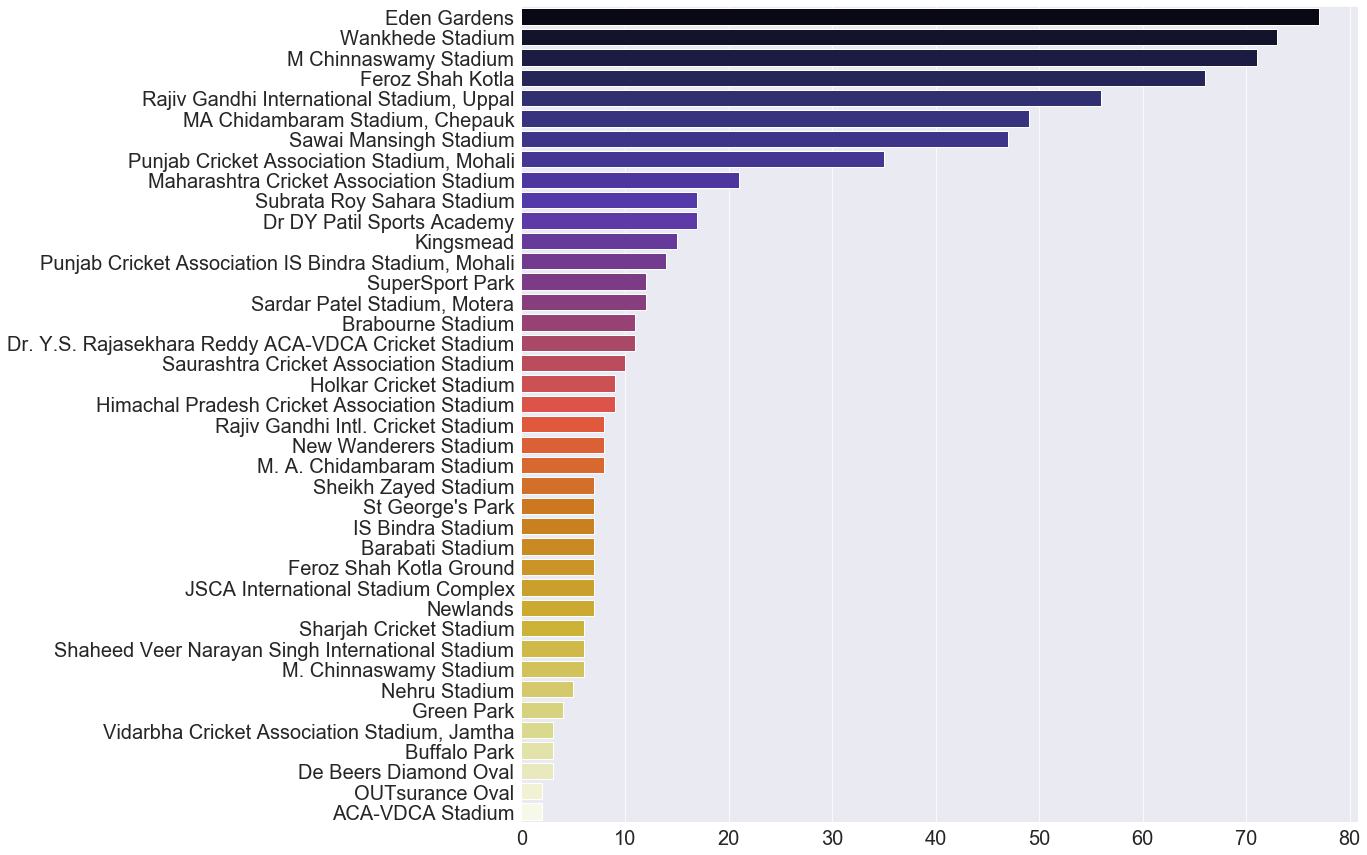

In [211]:
plt.rcParams["figure.figsize"] = (15,15)
sns.barplot(y = data.venue.value_counts().index ,x = data.venue.value_counts().values,orient = "h",palette = 'CMRmap')
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.show()

# Yes You Can See My text  Right ! 
# I love <span style="color:red" fontsize = 50px> MSD </span> , The Best Coolest <span style="color:red" fontsize = 50px> Captain </span> Ever


![](d2.jpg)

<span style="color:red" fontsize = 100px> MSD IPL CAREER </span> <br>
# 2008–2015  - Chennai Super Kings 
# 2016–2017 - Rising Pune Supergiants
# 2018–       - Chennai Super Kings 

In [212]:
# Here Comes Captain cool !
msd_data = data[data.player_of_match =="MS Dhoni"]
msd_data.winner.value_counts()

Chennai Super Kings        15
Rising Pune Supergiants     2
Name: winner, dtype: int64

# How many Matchs are  Won  By the team (CSK and RPS) When MSD Got Man Of the Match Award ?

### Note : We can see That There is Highly correlation Between Team Winning v/s MSD's Man of the match Award.
### Note : MSD Played in Both CSK and  Rising Pune Supergiants 

In [213]:
print("Total Number Of Man Of the Match awards won By MSD : ",msd_data.shape[0])
print("Sum Of Matches own by CSK and RPS When MSD Got MAN of the Match Award: ",(msd_data.winner.value_counts()[0]+msd_data.winner.value_counts()[1]))

Total Number Of Man Of the Match awards won By MSD :  17
Sum Of Matches own by CSK and RPS When MSD Got MAN of the Match Award:  17


# In which season MSD Got More Number Of Man of the Match Awards ?
ans : 2013 and 2019

In [223]:
fig = px.pie(names = msd_data.season.value_counts().index, values = msd_data.season.value_counts().values,title = "Number Of Man of the Match Awards Won by MSD in Each Seasons",hole= 0.5)
fig.update_traces(textinfo='value')
fig.show()

#  Let's Compare  <span style="color:red" fontsize = 75px >CSK v/s RCB </span> 

## Note : <span style="color:green" fontsize = 75px > I'm Big Fan Of CSK </span>   

![](cr.jpg)

# Total Number Of matches Held between CSK and RCB :  23

In [215]:
CSK_RCB = data[((data.team1 =="Royal Challengers Bangalore") & (data.team2 =="Chennai Super Kings")) | ((data.team2 =="Royal Challengers Bangalore") & (data.team1 =="Chennai Super Kings"))]
print("Total Number Of matches Held between CSK and RCB : ",CSK_RCB.shape[0])
CSK_RCB.head(3)

Total Number Of matches Held between CSK and RCB :  23


,season,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
73,2008,Bangalore,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,13,0,MS Dhoni,M Chinnaswamy Stadium
106,2008,Chennai,Royal Challengers Bangalore,Chennai Super Kings,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,14,0,A Kumble,"MA Chidambaram Stadium, Chepauk"
121,2009,Port Elizabeth,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,92,0,M Muralitharan,St George's Park


# Which Team won More Number of Matches Between CSK and RCB
ans : Did You see that CSK won more number times 

In [216]:
name  = CSK_RCB.winner.value_counts().index
value = CSK_RCB.winner.value_counts().values
px.pie(names = name,values = value)

# Which Team won More Number of Tosses Between CSK and RCB
ans : csk

In [217]:
name  = CSK_RCB.toss_winner.value_counts().index
value = CSK_RCB.toss_winner.value_counts().values
px.bar(x = name,y = value,color = name,labels = {"x":"CSK v/s RCB ","y":"Number Of time toss's won "})

# Which Team Player (Top - 5) Got More Number Of Man of the Match Award  ?

In [218]:
CSK_RCB.player_of_match.value_counts().head(5)

SK Raina          3
MS Dhoni          3
M Vijay           2
RA Jadeja         2
M Muralitharan    1
Name: player_of_match, dtype: int64

# Did You Saw That , yes it is our <span style="color:red" fontsize = 75px > Suresh Raina (Sexiest Player) </span>Who Got Most  Of the Man Of the Match awards  in matchs held between csk v/s rcb

![](sr1.png)

In [219]:
name  = CSK_RCB.player_of_match.value_counts().head(5).index
value = CSK_RCB.player_of_match.value_counts().head(5).values
px.bar(x = name,y = value,color = name,labels = {"x":"Number of times Man of The Match Award","y":"Player's From csk and rcb "})

In [220]:
print("Toss Decision ")
x = pd.crosstab(CSK_RCB['toss_winner'], CSK_RCB['toss_decision'])
x = pd.DataFrame(x)
x

Toss Decision 


toss_decision,bat,field
toss_winner,,
Chennai Super Kings,7,10
Royal Challengers Bangalore,3,3


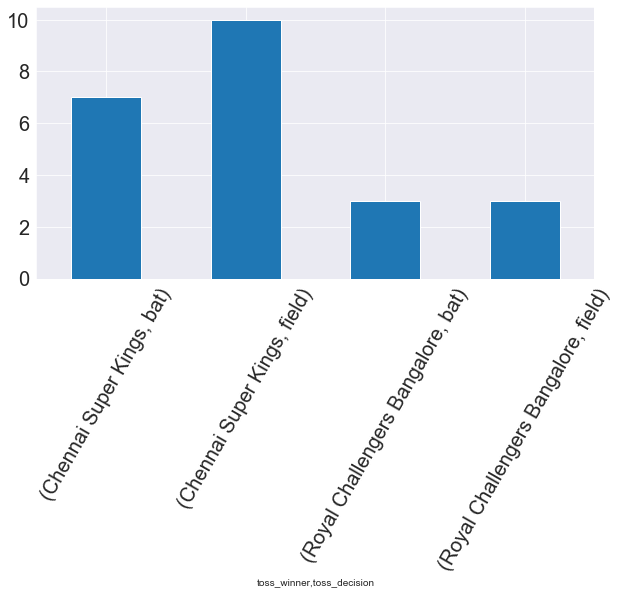

In [221]:
plt.rcParams["figure.figsize"] = (10,5)
CSK_RCB.groupby(["toss_winner","toss_decision"])["winner"].count().plot(kind = 'bar')
plt.xticks(rotation = 60)
plt.show()

# Thank You  :) 
